In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from rcg.utils import *
from rcg.mol_ops import *
from rcg.noe import NOE
from rdkit import Chem
import logging
import pandas as pd
pd.set_option('display.max_rows', None)

logging.getLogger().setLevel(logging.INFO)
# logging.basicConfig(format=' %(asctime)s - %(levelname)s - %(message)s')
logging.basicConfig(format='%(levelname)s - %(message)s')


# Parsing
1. creates RDKit molecule by matching SMILES string to PDB record
1. assign names to hydrogens 
1. parse NOE restraints file, creates a `NOE` object
1. checking correspondance between the molecule and the NOE records

In [3]:
#load example molecule residing in the corresponding directory
name = "6BF3"
name = "{}/{}".format(name.upper(), name.lower())
smiles = open(get_data_file_path("{}.smi".format(name)), "r").readlines()[0].strip()

In [4]:
# `infer_names` allows naming hydrogens based on the name of their attached heavy atom
# often the hydrogen names in the NOE is not those in the pdb
# more matches tend to occur with infer_names = True

#INFO shows the registered name of each hydrogen atom 
mol = mol_from_smiles_pdb(smiles, pdb_filename = get_data_file_path("{}.pdb".format(name)), infer_names = True)

INFO - Residue number 1, hydrogen attached to atom  N   is assigned name HN
INFO - Residue number 1, hydrogen attached to atom  CA  is assigned name HA
INFO - Residue number 1, hydrogen attached to atom  CB  is assigned name HB1
INFO - Residue number 1, hydrogen attached to atom  CB  is assigned name HB2
INFO - Residue number 1, hydrogen attached to atom  CG  is assigned name HG1
INFO - Residue number 1, hydrogen attached to atom  CG  is assigned name HG2
INFO - Residue number 1, hydrogen attached to atom  NE2 is assigned name HE21
INFO - Residue number 1, hydrogen attached to atom  NE2 is assigned name HE22
INFO - Residue number 2, hydrogen attached to atom  N   is assigned name HN
INFO - Residue number 2, hydrogen attached to atom  CA  is assigned name HA
INFO - Residue number 2, hydrogen attached to atom  CB  is assigned name HB1
INFO - Residue number 2, hydrogen attached to atom  CB  is assigned name HB2
INFO - Residue number 3, hydrogen attached to atom  CA  is assigned name HA
IN

In [5]:
# parse NOE file into an object
noe = NOE()
noe.from_explor(get_data_file_path("{}.mr".format(name)))

INFO - Parser: Read data as XPLOR format.
INFO - NumExpr defaulting to 8 threads.


INFO - 
        66 records assigned to molecule (records for chemically equivalent atoms count as one), including:
               -38 records for atoms separated by 0 residues.
               -16 records for atoms separated by 1 residues.
               -7 records for atoms separated by 2 residues.
               -5 records for atoms separated by 3 residues.
        Largest separation has atoms separated by 13 bonds, where the largest ring in molecule is of size 21.         
        0 records cannot be assigned to molecule due to mismatch.
        


,Atom Index,Atom Name,Residue Number,Residue Name,Depiction
0,26,HA,2,ASP,
1,27,HB1,2,ASP,
2,28,HB2,2,ASP,
3,25,HN,2,ASP,
4,36,HA,3,PRO,
5,37,HB1,3,PRO,
6,38,HB2,3,PRO,
7,41,HD1,3,PRO,
8,42,HD2,3,PRO,
9,39,HG1,3,PRO,

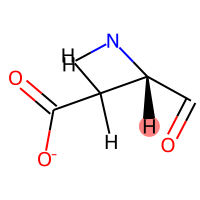
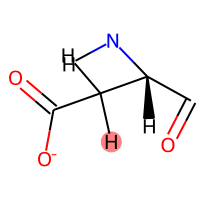
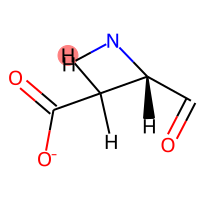
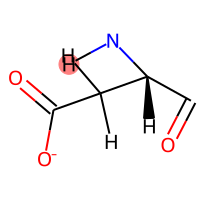
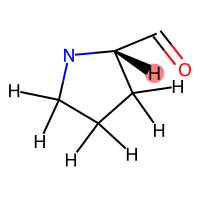
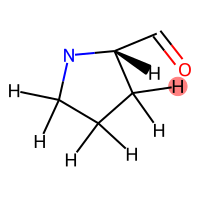
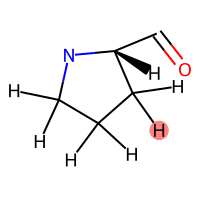
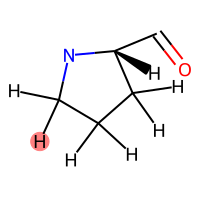
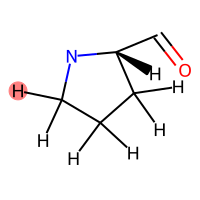
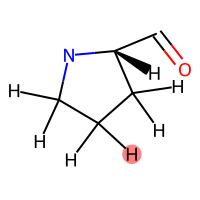
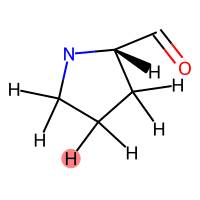
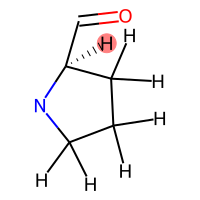
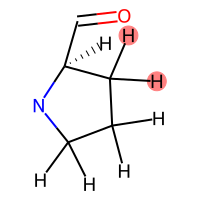
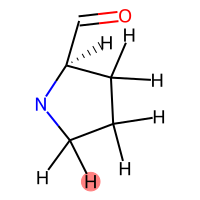
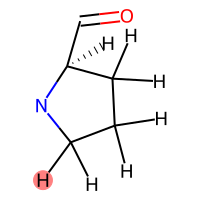
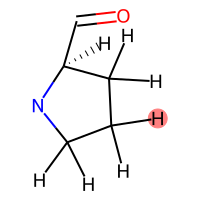
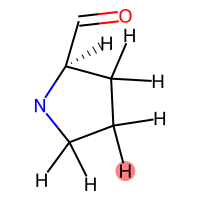
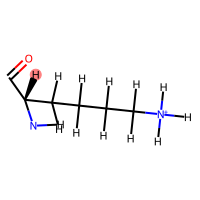
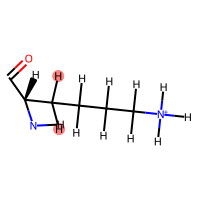
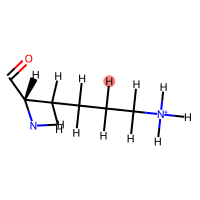
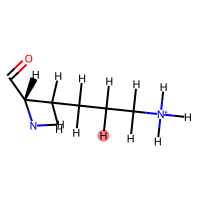
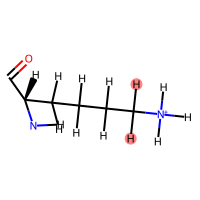
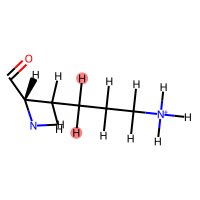
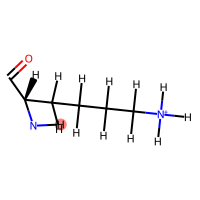
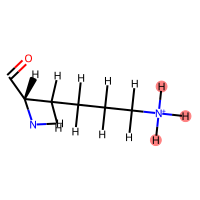
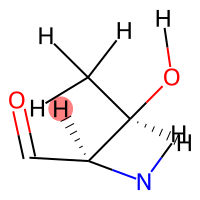
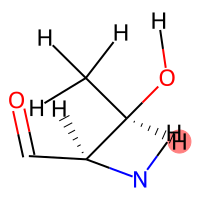
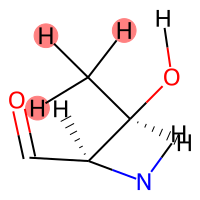
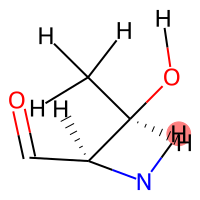
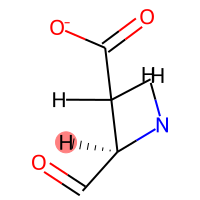
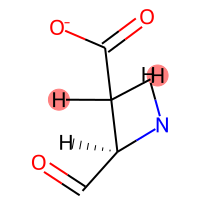
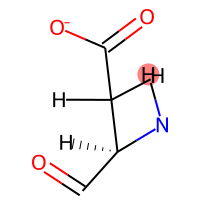

In [6]:
# give the NOE record the molecule to check for matches between the two
# First, any mismatches will show up as a warning (None in this molecule)
# then some basic information on the matches are shown

# the ensuing pandas table shows basic information on each matched hydrogen atom, 
# and an pictorial illustration on a residue level
noe.check_match_to_mol(mol)

In [7]:
# based on the information provided above, 
# one can use the below command to change some hydrogen names in the molecule to create better matches

#mol = rename(mol, old_name = "O", new_name = "XX", resid = "all")

In [8]:
noe.show()

,Residue_index_1,Residue_name_1,Residue_index_2,Residue_name_2,Prob_bound_[A],Low_diff_[A],High_diff_[A],Upper_bound_[A],Lower_bound_[A],Bonds Separation,Residues Separation,Has Match in Molecule
0,2,HA,2,HN,4.5,1.6,1.6,6.1,2.9,3,0,True
1,2,HB2,2,HN,4.5,1.6,1.6,6.1,2.9,4,0,True
2,2,HB1,2,HN,4.5,1.6,1.6,6.1,2.9,4,0,True
3,2,HN,6,HN,3.5,1.2,1.2,4.7,2.3,11,3,True
4,2,HB2,6,HN,4.5,1.6,1.6,6.1,2.9,13,3,True
5,2,HB1,6,HN,4.5,1.6,1.6,6.1,2.9,13,3,True
6,2,HN,7,HN,4.5,1.6,1.6,6.1,2.9,8,2,True
7,3,HB2,2,HN,4.5,1.6,1.6,6.1,2.9,7,1,True
8,3,HD2,2,HN,4.5,1.6,1.6,6.1,2.9,6,1,True
9,3,HD1,2,HN,4.5,1.6,1.6,6.1,2.9,6,1,True


# Confgen
1. combine NOE and molecule into `RestrainedMolecule`
    - `RestrainedMolecule` is inherited from RDKit molecule, any operation on RDKit molecule would work on it too
    - it is a generic object for generating conformers with additional distance (and in the future maybe other types of) restraints, agnostic of them being from NOE or other origins


In [9]:
resmol = noe.add_noe_to_mol(mol)

In [10]:
# incorporate the restraints into the distance bounds for conformer generation
resmol.update_bmat()

In [11]:
# currently confgen can stall if the bounds are too tight
# so first get a feel of the time needed for generation the required conformer ensemble
resmol.estimate_time(max_time_per_conf = 10) #in seconds

INFO - 0.9 seconds per conformer on average.


In [12]:
resmol.generate_conformers(num_conf = 10)

In [13]:
resmol.GetNumConformers()

10

In [14]:
#can visualise the conformers
import nglview as nv
view = nv.show_rdkit(resmol) 
view.clear_representations()
view.add_licorice()
view

_ColormakerRegistry()

NGLWidget()

# MD-based Postprocessing
- time-averaged distance restraints molecular dynamics simulation (at the moment only implicit solvent)
- results in a `Trajectory` object
- !! some molecules lacks certain bonded parameters and cannot be simulated (currently looking into this)

In [15]:
from rcg.simulation import Simulator

In [24]:
# currently the only robust partial charge assignment scheme supported
# QM based schemes would take hours for macrocycles
# model loading takes most of the time, and takes GB of space
# so load it once, assign charge to different molecules, then unload it to free memory
Simulator.load_mlddec(epsilon = 4)#dielectric, 4 is apolar solvent

  0%|          | 0/10 [00:00<?, ?it/s]

Loading models...


100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


In [31]:
#time-averaged restraint simulation
Simulator.simulate_tar(resmol,
                      which_conf = 0,
                      num_step = 50000, #100 ps
                      write_out_every = 2500,
                      )

INFO - 199 angles added (0 skipped due to constraints)
INFO - 107 bonds added (0 skipped due to constraints)
INFO - 18 impropers added, each applied in a six-fold trefoil
INFO - 302 torsions added
INFO - Adding bonds...
INFO - Adding angles...
INFO - Adding dihedrals...
INFO - Adding Ryckaert-Bellemans torsions...
INFO - Adding Urey-Bradleys...
INFO - Adding improper torsions...
INFO - Adding CMAP torsions...
INFO - Adding trigonal angle terms...
INFO - Adding out-of-plane bends...
INFO - Adding pi-torsions...
INFO - Adding stretch-bends...
INFO - Adding torsion-torsions...
INFO - Adding Nonbonded force...
100%|██████████| 50000/50000 [01:04<00:00, 780.02it/s] 


<mdtraj.Trajectory with 20 frames, 105 atoms, 1 residues, without unitcells at 0x7f5cb3f9ad50>

In [19]:
Simulator.unload_mlddec()

# Performance Metrics

In [32]:
from rcg.metrics import *

In [33]:
#get the ring atom rmsd of all conformer against each reference structure
get_ring_rmsd(resmol, 
              ref_pdb_path = get_data_file_path("{}.pdb".format(name)),
              ref_compare = "all"
             )

array([[3.6636581, 3.9391932, 4.435565 , 4.4942207, 4.4784737, 4.4424453,
        4.5441623, 4.007842 , 3.5414782, 4.245756 ],
       [3.6801672, 3.9745898, 4.4566197, 4.5265613, 4.496809 , 4.468783 ,
        4.570829 , 4.021448 , 3.5806627, 4.269164 ],
       [3.6331725, 3.9780684, 4.4242783, 4.467596 , 4.4659085, 4.4327087,
        4.5229125, 4.077448 , 3.5903418, 4.221038 ],
       [3.7414813, 4.034627 , 4.488542 , 4.567928 , 4.5601163, 4.514841 ,
        4.605715 , 4.08613  , 3.664358 , 4.3025804],
       [3.6877718, 3.9926066, 4.483389 , 4.525072 , 4.5208316, 4.4856234,
        4.5767617, 4.100059 , 3.5848894, 4.2740965],
       [3.6360044, 3.9800584, 4.413276 , 4.4812913, 4.4741755, 4.4363313,
        4.531599 , 4.057228 , 3.5851398, 4.2283716],
       [3.674979 , 3.9852338, 4.4843903, 4.542245 , 4.517738 , 4.5002704,
        4.595297 , 4.0730896, 3.5945363, 4.2925   ],
       [3.7386653, 4.000098 , 4.4595604, 4.5711894, 4.5761595, 4.5012374,
        4.584959 , 4.009598 , 3.64791

In [35]:
#get the ring atom torsion rmsd of all conformer against each reference structure
get_torsion_rmsd(resmol,               
                 ref_pdb_path = get_data_file_path("{}.pdb".format(name)),
              ref_compare = "all")

array([[108.029594, 108.22142 ,  88.819046, 109.9619  , 102.36036 ,
         99.38074 , 103.31989 , 117.96786 ,  92.05052 ,  96.81104 ],
       [109.299965, 109.34837 ,  85.89022 , 106.536514, 101.48281 ,
        100.904106, 104.49365 , 120.8793  ,  95.78847 ,  98.320526],
       [111.21655 , 111.26168 ,  84.29362 , 107.52347 ,  99.61455 ,
         98.92838 , 103.8921  , 120.84247 ,  94.71624 ,  97.002846],
       [109.50904 , 114.18893 ,  84.517555, 106.282906,  99.11295 ,
        102.81794 , 105.74952 , 121.79935 ,  95.82709 ,  99.431046],
       [112.23545 , 112.41118 ,  88.6943  , 108.42169 ,  99.68862 ,
        100.55308 , 107.35037 , 120.771904,  94.99303 ,  98.856804],
       [110.33207 , 111.11281 ,  86.38723 , 109.04051 , 100.40456 ,
        100.226685, 104.28314 , 121.96624 ,  93.35194 ,  97.49753 ],
       [109.92159 , 110.49783 ,  85.70008 , 106.62498 , 100.71627 ,
        101.51853 , 105.480385, 122.64152 ,  94.01029 ,  98.81874 ],
       [110.38989 , 110.31119 ,  82.27056

In [94]:
#for each conformer, check the individual deviation to the reference distance in the NOE
# and also the summed violation of each conformer
get_noe_pair_dist(resmol)

100%|██████████| 11/11 [00:00<00:00, 8070.20it/s]


(array([[-0.78646294, -0.78013979, -3.40619292, ..., -2.18200185,
         -3.58200185, -3.58200185],
        [-1.19524407, -0.80279302, -3.37204165, ..., -1.69655146,
         -3.09655146, -3.09655146],
        [-1.19537206, -0.44797606, -3.16276467, ..., -1.05600439,
         -2.45600439, -2.45600439],
        ...,
        [-1.53851085, -1.38944644, -3.25473403, ..., -1.94125868,
         -3.34125868, -3.34125868],
        [-2.09314325, -1.57591246, -3.11762985, ..., -1.92642087,
         -3.32642087, -3.32642087],
        [-1.13270045, -2.63009431, -3.16418309, ..., -0.83684966,
         -2.23684966, -2.23684966]]),
 array([1.04526724, 2.05272332, 0.46370777, 1.89896857, 1.0463798 ,
        0.54369206, 0.88576387, 0.32254726, 1.71079904, 1.70313675,
        0.94966974]))